In [1]:
!pip install pillow matplotlib torchvision tqdm

Exploring FER2013 Dataset...

TRAIN Split Statistics:
------------------------------
angry       : 3995 images
disgust     :  436 images
fear        : 4097 images
happy       : 7215 images
neutral     : 4965 images
sad         : 4830 images
surprise    : 3171 images
Total       : 28709 images

TEST Split Statistics:
------------------------------
angry       :  958 images
disgust     :  111 images
fear        : 1024 images
happy       : 1774 images
neutral     : 1233 images
sad         : 1247 images
surprise    :  831 images
Total       : 7178 images

Visualizing sample images...


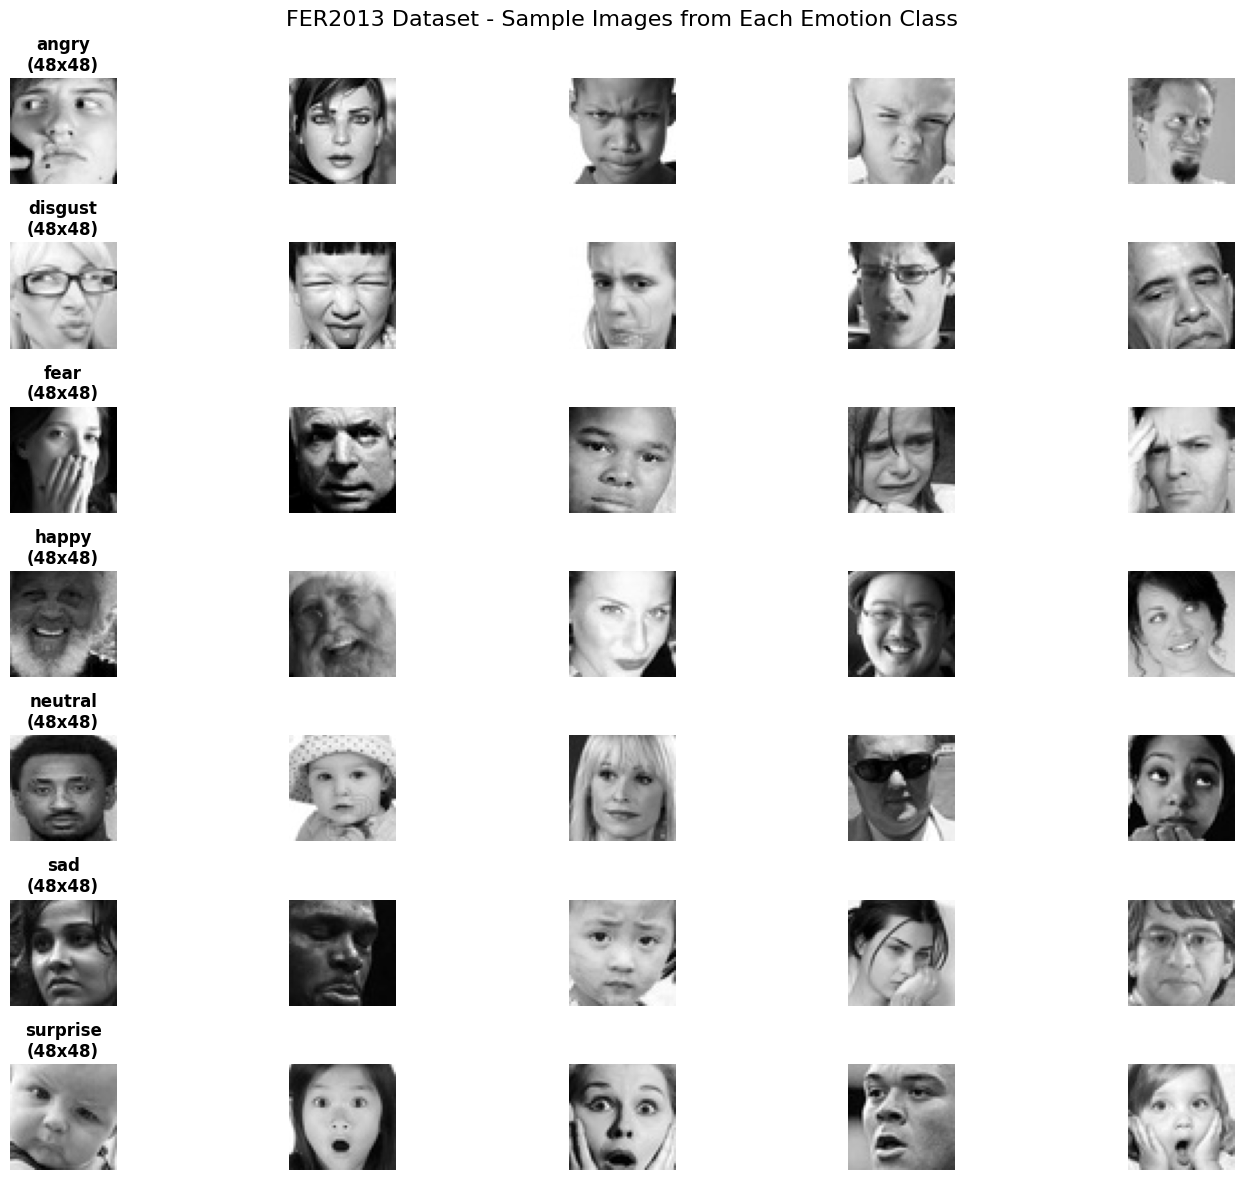


Found 7 emotion classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [2]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

# Set the path to your dataset
dataset_path = r"C:\Users\Admin\emod\data\fer2013"

def explore_dataset(dataset_path, num_samples=5):
    """
    Explore the FER2013 dataset by displaying random samples from each emotion class
    """
    # Define emotion classes based on folder names
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    
    # Create a figure for visualization
    fig, axes = plt.subplots(len(emotions), num_samples, figsize=(15, 12))
    fig.suptitle('FER2013 Dataset - Sample Images from Each Emotion Class', fontsize=16)
    
    for i, emotion in enumerate(emotions):
        # Construct path to train folder for this emotion
        emotion_path = os.path.join(dataset_path, 'train', emotion)
        
        # Check if path exists
        if not os.path.exists(emotion_path):
            print(f"Warning: Path {emotion_path} does not exist")
            continue
            
        # Get all image files in the emotion folder
        image_files = [f for f in os.listdir(emotion_path) 
                      if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        # Randomly select samples
        if len(image_files) >= num_samples:
            selected_files = random.sample(image_files, num_samples)
        else:
            selected_files = image_files
            print(f"Warning: Only {len(image_files)} images found for {emotion}")
        
        # Display each sample
        for j, image_file in enumerate(selected_files):
            if j < num_samples:  # Ensure we don't exceed subplot columns
                img_path = os.path.join(emotion_path, image_file)
                
                # Load and display image
                img = Image.open(img_path)
                ax = axes[i, j] if num_samples > 1 else axes[i]
                ax.imshow(img, cmap='gray' if img.mode == 'L' else None)
                ax.axis('off')
                
                # Only show emotion label for first image in row
                if j == 0:
                    ax.set_title(f"{emotion}\n({img.size[0]}x{img.size[1]})", 
                                fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return emotions

def get_dataset_stats(dataset_path):
    """
    Get basic statistics about the dataset
    """
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    stats = {}
    
    for split in ['train', 'test']:
        stats[split] = {}
        print(f"\n{split.upper()} Split Statistics:")
        print("-" * 30)
        
        total_images = 0
        for emotion in emotions:
            emotion_path = os.path.join(dataset_path, split, emotion)
            if os.path.exists(emotion_path):
                num_images = len([f for f in os.listdir(emotion_path) 
                                if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
                stats[split][emotion] = num_images
                total_images += num_images
                print(f"{emotion:12}: {num_images:4} images")
            else:
                stats[split][emotion] = 0
                print(f"{emotion:12}: Folder not found")
        
        print(f"{'Total':12}: {total_images:4} images")
    
    return stats

# Main execution
if __name__ == "__main__":
    # Check if dataset path exists
    if not os.path.exists(dataset_path):
        print(f"Dataset path {dataset_path} does not exist!")
        print("Please check the path and try again.")
    else:
        print("Exploring FER2013 Dataset...")
        
        # Get dataset statistics
        stats = get_dataset_stats(dataset_path)
        
        # Visualize sample images
        print("\nVisualizing sample images...")
        emotions = explore_dataset(dataset_path, num_samples=5)
        
        print(f"\nFound {len(emotions)} emotion classes: {emotions}")

Creating dataset visualizations...


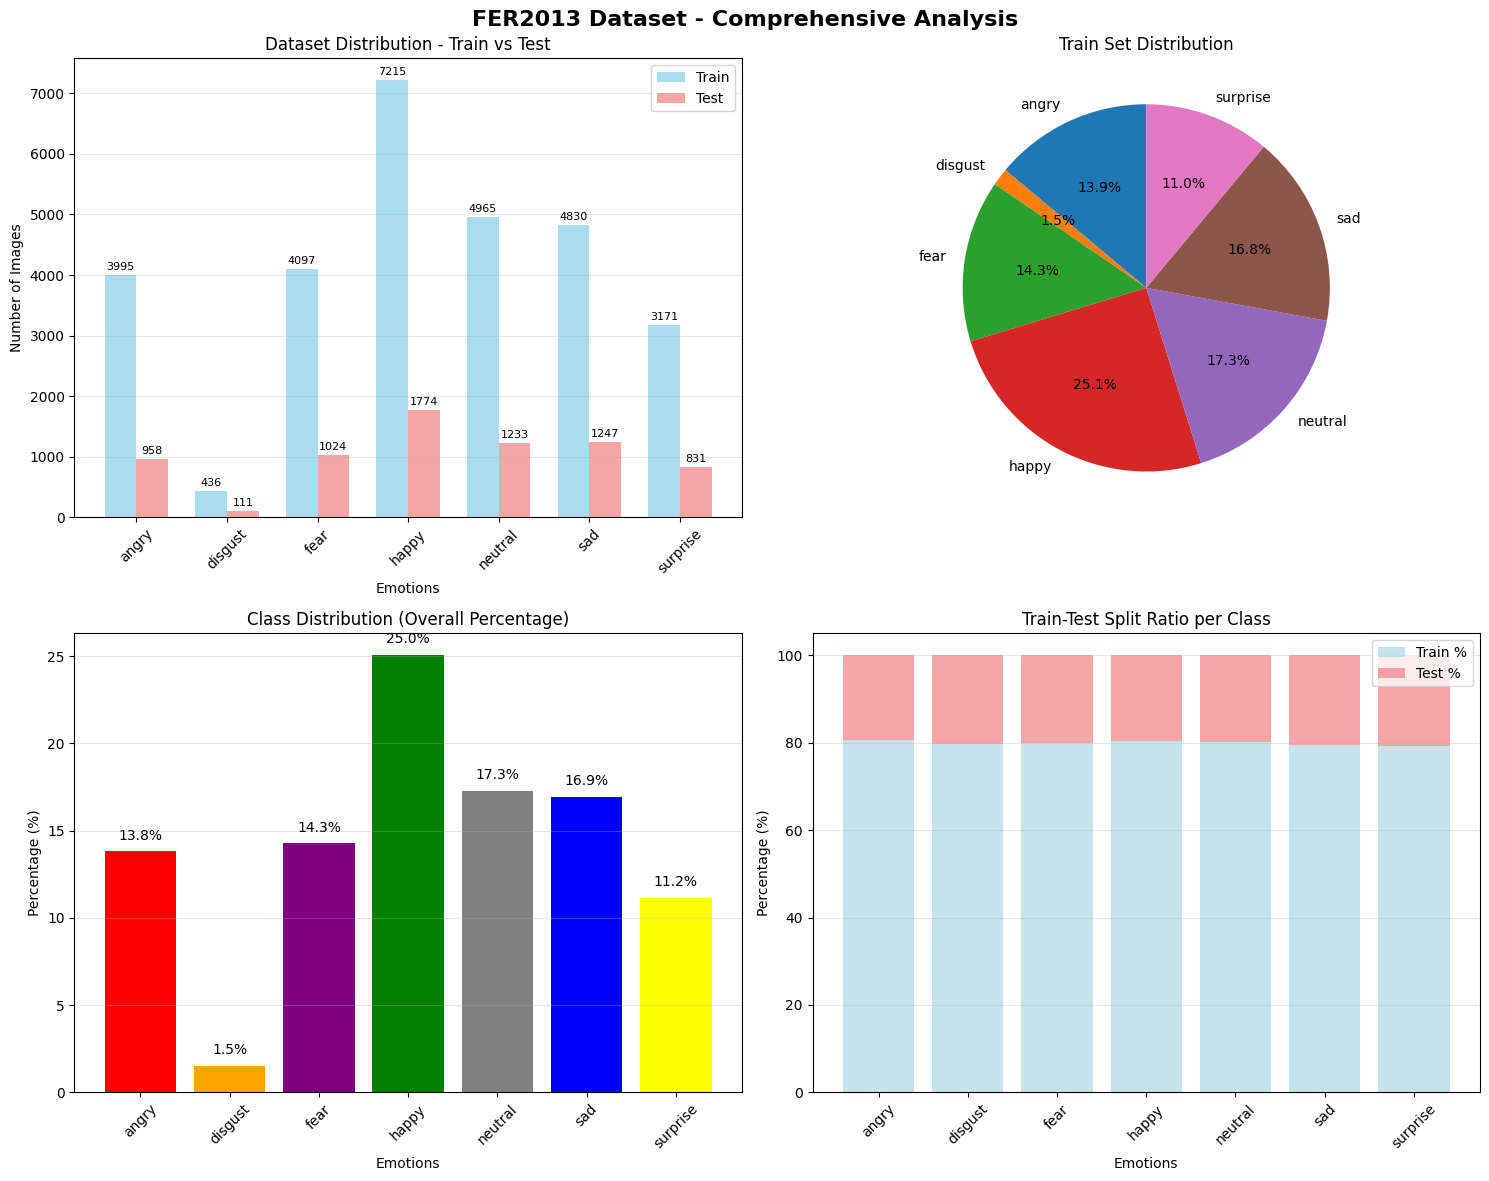


CLASS IMBALANCE ANALYSIS
Emotion      Train    Test     Total    % of Total   Imbalance Factor
----------------------------------------------------------------------
angry        3995     958      4953     13.8         9.1            x
disgust      436      111      547      1.5          1.0            x
fear         4097     1024     5121     14.3         9.4            x
happy        7215     1774     8989     25.0         16.4           x
neutral      4965     1233     6198     17.3         11.3           x
sad          4830     1247     6077     16.9         11.1           x
surprise     3171     831      4002     11.2         7.3            x

Most frequent class: happy (8989 images)
Least frequent class: disgust (547 images)
Imbalance ratio (max/min): 16.4x

Dataset is IMBALANCED (using 0.5 ratio threshold)

IMAGE PROPERTIES ANALYSIS
Emotion      Avg Width    Avg Height   Common Mode 
--------------------------------------------------
angry        48.0         48.0         L    

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import defaultdict
from PIL import Image
import os

def plot_dataset_distribution(stats):
    """
    Create visualizations to understand dataset distribution and characteristics
    """
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('FER2013 Dataset - Comprehensive Analysis', fontsize=16, fontweight='bold')
    
    # 1. Bar plot - Train vs Test distribution
    train_counts = [stats['train'][emotion] for emotion in emotions]
    test_counts = [stats['test'][emotion] for emotion in emotions]
    
    x = np.arange(len(emotions))
    width = 0.35
    
    axes[0, 0].bar(x - width/2, train_counts, width, label='Train', alpha=0.7, color='skyblue')
    axes[0, 0].bar(x + width/2, test_counts, width, label='Test', alpha=0.7, color='lightcoral')
    axes[0, 0].set_title('Dataset Distribution - Train vs Test')
    axes[0, 0].set_xlabel('Emotions')
    axes[0, 0].set_ylabel('Number of Images')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(emotions, rotation=45)
    axes[0, 0].legend()
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(train_counts):
        axes[0, 0].text(i - width/2, v + 50, str(v), ha='center', va='bottom', fontsize=8)
    for i, v in enumerate(test_counts):
        axes[0, 0].text(i + width/2, v + 50, str(v), ha='center', va='bottom', fontsize=8)
    
    # 2. Pie chart - Train set distribution
    axes[0, 1].pie(train_counts, labels=emotions, autopct='%1.1f%%', startangle=90)
    axes[0, 1].set_title('Train Set Distribution')
    
    # 3. Class imbalance analysis
    total_counts = [train_counts[i] + test_counts[i] for i in range(len(emotions))]
    percentages = [count/sum(total_counts)*100 for count in total_counts]
    
    colors = ['red', 'orange', 'purple', 'green', 'gray', 'blue', 'yellow']
    bars = axes[1, 0].bar(emotions, percentages, color=colors)
    axes[1, 0].set_title('Class Distribution (Overall Percentage)')
    axes[1, 0].set_xlabel('Emotions')
    axes[1, 0].set_ylabel('Percentage (%)')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Add percentage labels on bars
    for bar, percentage in zip(bars, percentages):
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                       f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)
    
    # 4. Train-Test ratio per class
    train_ratios = [stats['train'][emotion]/(stats['train'][emotion] + stats['test'][emotion])*100 
                   for emotion in emotions]
    test_ratios = [stats['test'][emotion]/(stats['train'][emotion] + stats['test'][emotion])*100 
                  for emotion in emotions]
    
    axes[1, 1].bar(emotions, train_ratios, label='Train %', alpha=0.7, color='lightblue')
    axes[1, 1].bar(emotions, test_ratios, bottom=train_ratios, label='Test %', alpha=0.7, color='lightcoral')
    axes[1, 1].set_title('Train-Test Split Ratio per Class')
    axes[1, 1].set_xlabel('Emotions')
    axes[1, 1].set_ylabel('Percentage (%)')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].legend()
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return total_counts, percentages

def analyze_class_imbalance(stats):
    """
    Analyze and print class imbalance information
    """
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    
    print("\n" + "="*50)
    print("CLASS IMBALANCE ANALYSIS")
    print("="*50)
    
    # Calculate total per class
    total_per_class = {}
    for emotion in emotions:
        total_per_class[emotion] = stats['train'][emotion] + stats['test'][emotion]
    
    total_images = sum(total_per_class.values())
    
    print(f"{'Emotion':<12} {'Train':<8} {'Test':<8} {'Total':<8} {'% of Total':<12} {'Imbalance Factor'}")
    print("-" * 70)
    
    max_count = max(total_per_class.values())
    min_count = min(total_per_class.values())
    
    for emotion in emotions:
        total = total_per_class[emotion]
        percentage = (total / total_images) * 100
        imbalance_factor = total / min_count  # How many times larger than smallest class
        
        print(f"{emotion:<12} {stats['train'][emotion]:<8} {stats['test'][emotion]:<8} "
              f"{total:<8} {percentage:<12.1f} {imbalance_factor:<15.1f}x")
    
    print(f"\nMost frequent class: {max(total_per_class, key=total_per_class.get)} "
          f"({max_count} images)")
    print(f"Least frequent class: {min(total_per_class, key=total_per_class.get)} "
          f"({min_count} images)")
    print(f"Imbalance ratio (max/min): {max_count/min_count:.1f}x")
    
    # Check if dataset is balanced (common threshold: no class < 50% of max)
    is_balanced = min_count > (max_count * 0.5)
    print(f"\nDataset is {'BALANCED' if is_balanced else 'IMBALANCED'} "
          f"(using 0.5 ratio threshold)")

def check_image_properties(dataset_path, sample_size=20):
    """
    Check image dimensions and properties across different classes
    """
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    
    print(f"\n" + "="*50)
    print("IMAGE PROPERTIES ANALYSIS")
    print("="*50)
    
    image_sizes = defaultdict(list)
    color_modes = defaultdict(list)
    
    for emotion in emotions:
        emotion_path = os.path.join(dataset_path, 'train', emotion)
        if os.path.exists(emotion_path):
            image_files = [f for f in os.listdir(emotion_path) 
                          if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            
            # Sample random images
            if len(image_files) > sample_size:
                sampled_files = random.sample(image_files, sample_size)
            else:
                sampled_files = image_files
            
            for image_file in sampled_files:
                img_path = os.path.join(emotion_path, image_file)
                try:
                    with Image.open(img_path) as img:
                        image_sizes[emotion].append(img.size)
                        color_modes[emotion].append(img.mode)
                except Exception as e:
                    print(f"Error reading {img_path}: {e}")
    
    # Print summary
    print(f"{'Emotion':<12} {'Avg Width':<12} {'Avg Height':<12} {'Common Mode':<12}")
    print("-" * 50)
    
    for emotion in emotions:
        if emotion in image_sizes and image_sizes[emotion]:
            avg_width = np.mean([size[0] for size in image_sizes[emotion]])
            avg_height = np.mean([size[1] for size in image_sizes[emotion]])
            common_mode = max(set(color_modes[emotion]), key=color_modes[emotion].count)
            
            print(f"{emotion:<12} {avg_width:<12.1f} {avg_height:<12.1f} {common_mode:<12}")
        else:
            print(f"{emotion:<12} {'N/A':<12} {'N/A':<12} {'N/A':<12}")

# Main execution
if __name__ == "__main__":
    # Dataset path
    dataset_path = r"C:\Users\Admin\emod\data\fer2013"
    
    # Use the stats from previous step
    stats = {
        'train': {'angry': 3995, 'disgust': 436, 'fear': 4097, 'happy': 7215, 
                 'neutral': 4965, 'sad': 4830, 'surprise': 3171},
        'test': {'angry': 958, 'disgust': 111, 'fear': 1024, 'happy': 1774, 
                'neutral': 1233, 'sad': 1247, 'surprise': 831}
    }
    
    # Create comprehensive visualizations
    print("Creating dataset visualizations...")
    total_counts, percentages = plot_dataset_distribution(stats)
    
    # Analyze class imbalance
    analyze_class_imbalance(stats)
    
    # Check image properties
    check_image_properties(dataset_path)

In [20]:
import torch
from torch.utils.data import DataLoader, WeightedRandomSampler
from torchvision import datasets, transforms
from collections import Counter

def get_data_loaders():
    train_transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])
    
    val_transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])

    train_dataset = datasets.ImageFolder(
        'C:/Users/Admin/emod/data/fer2013/train',
        transform=train_transform
    )
    
    test_dataset = datasets.ImageFolder(
        'C:/Users/Admin/emod/data/fer2013/test', 
        transform=val_transform
    )

    train_targets = [label for _, label in train_dataset]
    class_counts = Counter(train_targets)
    total_samples = len(train_targets)
    
    class_weights = {
        class_id: total_samples / (len(class_counts) * count)
        for class_id, count in class_counts.items()
    }
    
    sample_weights = [class_weights[label] for _, label in train_dataset]
    sampler = WeightedRandomSampler(sample_weights, len(sample_weights))
    
    train_loader = DataLoader(train_dataset, batch_size=64, sampler=sampler)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
    
    class_weights_tensor = torch.tensor([class_weights[i] for i in sorted(class_weights.keys())])
    
    return train_loader, test_loader, class_weights_tensor

In [21]:
import torch.nn as nn

class EmotionCNN(nn.Module):
    def __init__(self, num_classes=7):
        super(EmotionCNN, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25),
            
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25),
            
            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25),
        )
        
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((4, 4)),
            nn.Flatten(),
            nn.Linear(256 * 4 * 4, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [22]:
import torch.optim as optim

def setup_training(device):
    train_loader, test_loader, class_weights = get_data_loaders()
    
    class_weights = class_weights.to(device)
    model = EmotionCNN().to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    return model, train_loader, test_loader, criterion, optimizer

In [23]:
def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    return running_loss/len(loader), correct/total

def validate(model, loader, criterion, device):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    return running_loss/len(loader), correct/total

In [24]:
def train_model():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model, train_loader, test_loader, criterion, optimizer = setup_training(device)
    
    num_epochs = 30
    
    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc = validate(model, test_loader, criterion, device)
        
        print(f"Epoch {epoch+1:2d}/{num_epochs} | "
              f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
    
    return model

model = train_model()

Epoch  1/30 | Train Loss: 1.3647 | Train Acc: 0.1602 | Val Loss: 2.5759 | Val Acc: 0.0727
Epoch  2/30 | Train Loss: 1.1358 | Train Acc: 0.2086 | Val Loss: 2.7277 | Val Acc: 0.0595
Epoch  3/30 | Train Loss: 1.0325 | Train Acc: 0.2380 | Val Loss: 2.1974 | Val Acc: 0.1142
Epoch  4/30 | Train Loss: 0.9426 | Train Acc: 0.2631 | Val Loss: 1.9299 | Val Acc: 0.1764
Epoch  5/30 | Train Loss: 0.9042 | Train Acc: 0.3098 | Val Loss: 1.9576 | Val Acc: 0.2621
Epoch  6/30 | Train Loss: 0.8585 | Train Acc: 0.3535 | Val Loss: 1.8131 | Val Acc: 0.3103
Epoch  7/30 | Train Loss: 0.8088 | Train Acc: 0.3734 | Val Loss: 1.7660 | Val Acc: 0.3515
Epoch  8/30 | Train Loss: 0.7699 | Train Acc: 0.4005 | Val Loss: 1.9019 | Val Acc: 0.3447
Epoch  9/30 | Train Loss: 0.7477 | Train Acc: 0.4223 | Val Loss: 1.6005 | Val Acc: 0.4068
Epoch 10/30 | Train Loss: 0.7127 | Train Acc: 0.4310 | Val Loss: 1.5419 | Val Acc: 0.4338
Epoch 11/30 | Train Loss: 0.7017 | Train Acc: 0.4458 | Val Loss: 1.3974 | Val Acc: 0.4746
Epoch 12/3

In [25]:
import torchvision.models as models

class EmotionVGG16(nn.Module):
    def __init__(self, num_classes=7):
        super(EmotionVGG16, self).__init__()
        
        self.vgg = models.vgg16(pretrained=True)
        
        # Modify first conv layer for grayscale input
        self.vgg.features[0] = nn.Conv2d(1, 64, kernel_size=3, padding=1)
        
        # Freeze early layers
        for param in self.vgg.features[:10].parameters():
            param.requires_grad = False
            
        # Replace classifier
        self.vgg.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, num_classes)
        )
    
    def forward(self, x):
        return self.vgg(x)

def setup_vgg_training(device):
    train_loader, test_loader, class_weights = get_data_loaders()
    
    class_weights = class_weights.to(device)
    model = EmotionVGG16().to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    
    return model, train_loader, test_loader, criterion, optimizer

In [26]:
def train_vgg_model():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model, train_loader, test_loader, criterion, optimizer = setup_vgg_training(device)
    
    num_epochs = 20
    
    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc = validate(model, test_loader, criterion, device)
        
        print(f"Epoch {epoch+1:2d}/{num_epochs} | "
              f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
    
    return model

vgg_model = train_vgg_model()

C:\Users\Admin\anaconda3\envs\torch-gpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\torch-gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch  1/20 | Train Loss: 1.0654 | Train Acc: 0.2441 | Val Loss: 1.9823 | Val Acc: 0.2053
Epoch  2/20 | Train Loss: 0.7959 | Train Acc: 0.3680 | Val Loss: 1.7297 | Val Acc: 0.3331
Epoch  3/20 | Train Loss: 0.6793 | Train Acc: 0.4316 | Val Loss: 1.6393 | Val Acc: 0.3833
Epoch  4/20 | Train Loss: 0.6101 | Train Acc: 0.4887 | Val Loss: 1.5719 | Val Acc: 0.4085
Epoch  5/20 | Train Loss: 0.5466 | Train Acc: 0.5298 | Val Loss: 1.3494 | Val Acc: 0.4873
Epoch  6/20 | Train Loss: 0.5259 | Train Acc: 0.5561 | Val Loss: 1.4561 | Val Acc: 0.4615
Epoch  7/20 | Train Loss: 0.5104 | Train Acc: 0.5749 | Val Loss: 1.3770 | Val Acc: 0.4941
Epoch  8/20 | Train Loss: 0.4632 | Train Acc: 0.6033 | Val Loss: 1.2835 | Val Acc: 0.5242
Epoch  9/20 | Train Loss: 0.4506 | Train Acc: 0.6173 | Val Loss: 1.3471 | Val Acc: 0.4954
Epoch 10/20 | Train Loss: 0.4359 | Train Acc: 0.6274 | Val Loss: 1.3883 | Val Acc: 0.5047
Epoch 11/20 | Train Loss: 0.4098 | Train Acc: 0.6537 | Val Loss: 1.2754 | Val Acc: 0.5389
Epoch 12/2

In [27]:
class EmotionEfficientNet(nn.Module):
    def __init__(self, num_classes=7):
        super(EmotionEfficientNet, self).__init__()
        
        self.efficientnet = models.efficientnet_b0(pretrained=True)
        
        # Modify first conv layer for grayscale input
        self.efficientnet.features[0][0] = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1, bias=False)
        
        # Freeze early layers
        for param in self.efficientnet.features[:3].parameters():
            param.requires_grad = False
            
        # Replace classifier
        self.efficientnet.classifier = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(1280, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, num_classes)
        )
    
    def forward(self, x):
        return self.efficientnet(x)

def setup_efficientnet_training(device):
    train_loader, test_loader, class_weights = get_data_loaders()
    
    class_weights = class_weights.to(device)
    model = EmotionEfficientNet().to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.Adam(model.parameters(), lr=0.0002)
    
    return model, train_loader, test_loader, criterion, optimizer

In [28]:
def train_efficientnet_model():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model, train_loader, test_loader, criterion, optimizer = setup_efficientnet_training(device)
    
    num_epochs = 20
    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc = validate(model, test_loader, criterion, device)
        
        print(f"Epoch {epoch+1:2d}/{num_epochs} | "
              f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
    
    return model

efficientnet_model = train_efficientnet_model()

C:\Users\Admin\anaconda3\envs\torch-gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to C:\Users\Admin/.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-7f5810bc.pth


100%|█████████████████████████████████████████████████████████████████████████████| 20.5M/20.5M [00:09<00:00, 2.23MB/s]


Epoch  1/15 | Train Loss: 1.2645 | Train Acc: 0.1644 | Val Loss: 2.4778 | Val Acc: 0.0688
Epoch  2/15 | Train Loss: 1.0388 | Train Acc: 0.2504 | Val Loss: 2.1965 | Val Acc: 0.1748
Epoch  3/15 | Train Loss: 0.9218 | Train Acc: 0.3103 | Val Loss: 2.0153 | Val Acc: 0.2335
Epoch  4/15 | Train Loss: 0.8179 | Train Acc: 0.3662 | Val Loss: 1.8843 | Val Acc: 0.2855
Epoch  5/15 | Train Loss: 0.7603 | Train Acc: 0.4000 | Val Loss: 1.7893 | Val Acc: 0.3133
Epoch  6/15 | Train Loss: 0.7169 | Train Acc: 0.4216 | Val Loss: 1.7077 | Val Acc: 0.3530
Epoch  7/15 | Train Loss: 0.6702 | Train Acc: 0.4439 | Val Loss: 1.6521 | Val Acc: 0.3713
Epoch  8/15 | Train Loss: 0.6276 | Train Acc: 0.4710 | Val Loss: 1.5911 | Val Acc: 0.3990
Epoch  9/15 | Train Loss: 0.6229 | Train Acc: 0.4837 | Val Loss: 1.5592 | Val Acc: 0.4067
Epoch 10/15 | Train Loss: 0.6113 | Train Acc: 0.4915 | Val Loss: 1.5295 | Val Acc: 0.4250
Epoch 11/15 | Train Loss: 0.5787 | Train Acc: 0.5125 | Val Loss: 1.5456 | Val Acc: 0.4327
Epoch 12/1

In [29]:
class EmotionResNet34(nn.Module):
    def __init__(self, num_classes=7):
        super(EmotionResNet34, self).__init__()
        
        self.resnet = models.resnet34(pretrained=True)
        
        # Modify first conv layer for grayscale input
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        
        # Freeze early layers
        for param in self.resnet.layer1.parameters():
            param.requires_grad = False
            
        # Replace classifier
        self.resnet.fc = nn.Sequential(
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )
    
    def forward(self, x):
        return self.resnet(x)

def setup_resnet_training(device):
    train_loader, test_loader, class_weights = get_data_loaders()
    
    class_weights = class_weights.to(device)
    model = EmotionResNet34().to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)
    
    return model, train_loader, test_loader, criterion, optimizer

def train_resnet_model():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model, train_loader, test_loader, criterion, optimizer = setup_resnet_training(device)
    
    num_epochs = 20
    
    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc = validate(model, test_loader, criterion, device)
        
        print(f"Epoch {epoch+1:2d}/{num_epochs} | "
              f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
    
    return model

resnet_model = train_resnet_model()

C:\Users\Admin\anaconda3\envs\torch-gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch  1/20 | Train Loss: 1.2493 | Train Acc: 0.2118 | Val Loss: 2.2548 | Val Acc: 0.1357
Epoch  2/20 | Train Loss: 0.8955 | Train Acc: 0.3141 | Val Loss: 2.0519 | Val Acc: 0.2187
Epoch  3/20 | Train Loss: 0.7710 | Train Acc: 0.3794 | Val Loss: 1.7661 | Val Acc: 0.3235
Epoch  4/20 | Train Loss: 0.6960 | Train Acc: 0.4283 | Val Loss: 1.7205 | Val Acc: 0.3518
Epoch  5/20 | Train Loss: 0.6610 | Train Acc: 0.4660 | Val Loss: 1.6028 | Val Acc: 0.3973
Epoch  6/20 | Train Loss: 0.6148 | Train Acc: 0.4984 | Val Loss: 1.5576 | Val Acc: 0.4143
Epoch  7/20 | Train Loss: 0.6043 | Train Acc: 0.5117 | Val Loss: 1.5202 | Val Acc: 0.4320
Epoch  8/20 | Train Loss: 0.5483 | Train Acc: 0.5353 | Val Loss: 1.4849 | Val Acc: 0.4458
Epoch  9/20 | Train Loss: 0.5301 | Train Acc: 0.5634 | Val Loss: 1.4493 | Val Acc: 0.4511
Epoch 10/20 | Train Loss: 0.5061 | Train Acc: 0.5759 | Val Loss: 1.4540 | Val Acc: 0.4533
Epoch 11/20 | Train Loss: 0.4990 | Train Acc: 0.5861 | Val Loss: 1.4362 | Val Acc: 0.4639
Epoch 12/2

In [30]:
class EmotionResNet18(nn.Module):
    def __init__(self, num_classes=7):
        super(EmotionResNet18, self).__init__()
        
        self.resnet = models.resnet18(pretrained=True)
        
        # Modify first conv layer for grayscale input
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        
        # Freeze only the first layer
        for param in self.resnet.layer1.parameters():
            param.requires_grad = False
            
        # Replace classifier
        self.resnet.fc = nn.Sequential(
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )
    
    def forward(self, x):
        return self.resnet(x)

def setup_resnet18_training(device):
    train_loader, test_loader, class_weights = get_data_loaders()
    
    class_weights = class_weights.to(device)
    model = EmotionResNet18().to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.Adam(model.parameters(), lr=0.0002, weight_decay=1e-4)
    
    return model, train_loader, test_loader, criterion, optimizer

def train_resnet18_model():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model, train_loader, test_loader, criterion, optimizer = setup_resnet18_training(device)
    
    num_epochs = 30
    
    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc = validate(model, test_loader, criterion, device)
        
        print(f"Epoch {epoch+1:2d}/{num_epochs} | "
              f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
    
    return model

resnet18_model = train_resnet18_model()

C:\Users\Admin\anaconda3\envs\torch-gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch  1/30 | Train Loss: 1.1679 | Train Acc: 0.2292 | Val Loss: 2.0324 | Val Acc: 0.1888
Epoch  2/30 | Train Loss: 0.8504 | Train Acc: 0.3387 | Val Loss: 1.8855 | Val Acc: 0.2711
Epoch  3/30 | Train Loss: 0.7390 | Train Acc: 0.4084 | Val Loss: 1.7755 | Val Acc: 0.3349
Epoch  4/30 | Train Loss: 0.6911 | Train Acc: 0.4447 | Val Loss: 1.6372 | Val Acc: 0.3834
Epoch  5/30 | Train Loss: 0.6444 | Train Acc: 0.4861 | Val Loss: 1.5115 | Val Acc: 0.4309
Epoch  6/30 | Train Loss: 0.6222 | Train Acc: 0.5045 | Val Loss: 1.6429 | Val Acc: 0.4150
Epoch  7/30 | Train Loss: 0.5964 | Train Acc: 0.5176 | Val Loss: 1.4323 | Val Acc: 0.4652
Epoch  8/30 | Train Loss: 0.5609 | Train Acc: 0.5478 | Val Loss: 1.3721 | Val Acc: 0.4880
Epoch  9/30 | Train Loss: 0.5407 | Train Acc: 0.5586 | Val Loss: 1.4985 | Val Acc: 0.4498
Epoch 10/30 | Train Loss: 0.5234 | Train Acc: 0.5725 | Val Loss: 1.3894 | Val Acc: 0.4763
Epoch 11/30 | Train Loss: 0.5043 | Train Acc: 0.5917 | Val Loss: 1.4027 | Val Acc: 0.4834
Epoch 12/3

In [32]:
def train_enhanced_model():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model, train_loader, test_loader, criterion, optimizer, scheduler = setup_enhanced_training(device)
    
    num_epochs = 40
    best_val_acc = 0.0
    
    print("Starting enhanced training...")
    print("=" * 70)
    
    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc = validate(model, test_loader, criterion, device)
        
        scheduler.step()
        current_lr = optimizer.param_groups[0]['lr']
        
        print(f"Epoch {epoch+1:2d}/{num_epochs} | "
              f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f} | "
              f"LR: {current_lr:.6f}")
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            print(f"  → New best! Val Acc: {val_acc:.4f}")
    
    print("=" * 70)
    print(f"Best validation accuracy: {best_val_acc:.4f}")
    return model

# Train the enhanced model
enhanced_model = train_enhanced_model()

Starting enhanced training...
Epoch  1/40 | Train Loss: 1.7375 | Train Acc: 0.1845 | Val Loss: 1.4572 | Val Acc: 0.0947 | LR: 0.000998
  → New best! Val Acc: 0.0947
Epoch  2/40 | Train Loss: 1.4673 | Train Acc: 0.2475 | Val Loss: 1.2216 | Val Acc: 0.1884 | LR: 0.000994
  → New best! Val Acc: 0.1884
Epoch  3/40 | Train Loss: 1.3816 | Train Acc: 0.2984 | Val Loss: 1.1381 | Val Acc: 0.2960 | LR: 0.000986
  → New best! Val Acc: 0.2960
Epoch  4/40 | Train Loss: 1.3289 | Train Acc: 0.3207 | Val Loss: 1.0776 | Val Acc: 0.3487 | LR: 0.000976
  → New best! Val Acc: 0.3487
Epoch  5/40 | Train Loss: 1.2829 | Train Acc: 0.3406 | Val Loss: 1.0976 | Val Acc: 0.2710 | LR: 0.000962
Epoch  6/40 | Train Loss: 1.2517 | Train Acc: 0.3552 | Val Loss: 0.9608 | Val Acc: 0.3930 | LR: 0.000946
  → New best! Val Acc: 0.3930
Epoch  7/40 | Train Loss: 1.2049 | Train Acc: 0.3673 | Val Loss: 0.9498 | Val Acc: 0.3929 | LR: 0.000926
Epoch  8/40 | Train Loss: 1.1657 | Train Acc: 0.3842 | Val Loss: 0.9645 | Val Acc: 0.

In [33]:
class OptimizedEmotionResNet18(nn.Module):
    def __init__(self, num_classes=7):
        super(OptimizedEmotionResNet18, self).__init__()
        
        self.resnet = models.resnet18(pretrained=True)
        
        # Keep original 3-channel input
        # Moderate freezing
        for param in self.resnet.layer1.parameters():
            param.requires_grad = False
            
        # Balanced classifier
        self.resnet.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )
    
    def forward(self, x):
        return self.resnet(x)

def get_optimized_data_loaders():
    # Balanced augmentation
    train_transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=3),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(10),
        transforms.RandomAffine(0, translate=(0.1, 0.1)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
    
    val_transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    train_dataset = datasets.ImageFolder(
        'C:/Users/Admin/emod/data/fer2013/train',
        transform=train_transform
    )
    
    test_dataset = datasets.ImageFolder(
        'C:/Users/Admin/emod/data/fer2013/test', 
        transform=val_transform
    )

    train_targets = [label for _, label in train_dataset]
    class_counts = Counter(train_targets)
    total_samples = len(train_targets)
    
    class_weights = {
        class_id: total_samples / (len(class_counts) * count)
        for class_id, count in class_counts.items()
    }
    
    sample_weights = [class_weights[label] for _, label in train_dataset]
    sampler = WeightedRandomSampler(sample_weights, len(sample_weights))
    
    train_loader = DataLoader(train_dataset, batch_size=64, sampler=sampler)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
    
    class_weights_tensor = torch.tensor([class_weights[i] for i in sorted(class_weights.keys())])
    
    return train_loader, test_loader, class_weights_tensor

def setup_optimized_training(device):
    train_loader, test_loader, class_weights = get_optimized_data_loaders()
    
    class_weights = class_weights.to(device)
    model = OptimizedEmotionResNet18().to(device)
    
    # Go back to weighted CrossEntropy (worked better)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    
    # Simple Adam optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)
    
    return model, train_loader, test_loader, criterion, optimizer

def train_optimized_model():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model, train_loader, test_loader, criterion, optimizer = setup_optimized_training(device)
    
    num_epochs = 35
    best_val_acc = 0.0
    
    print("Starting optimized training...")
    print("=" * 70)
    
    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc = validate(model, test_loader, criterion, device)
        
        print(f"Epoch {epoch+1:2d}/{num_epochs} | "
              f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            print(f"  → New best! Val Acc: {val_acc:.4f}")
    
    print("=" * 70)
    print(f"Best validation accuracy: {best_val_acc:.4f}")
    return model

# Train the optimized model
optimized_model = train_optimized_model()

Starting optimized training...
Epoch  1/35 | Train Loss: 1.1403 | Train Acc: 0.2605 | Val Loss: 1.9229 | Val Acc: 0.3037
  → New best! Val Acc: 0.3037
Epoch  2/35 | Train Loss: 0.8248 | Train Acc: 0.4080 | Val Loss: 1.5955 | Val Acc: 0.4115
  → New best! Val Acc: 0.4115
Epoch  3/35 | Train Loss: 0.7101 | Train Acc: 0.4765 | Val Loss: 1.4541 | Val Acc: 0.4565
  → New best! Val Acc: 0.4565
Epoch  4/35 | Train Loss: 0.6190 | Train Acc: 0.5220 | Val Loss: 1.4127 | Val Acc: 0.4833
  → New best! Val Acc: 0.4833
Epoch  5/35 | Train Loss: 0.5791 | Train Acc: 0.5446 | Val Loss: 1.3261 | Val Acc: 0.5141
  → New best! Val Acc: 0.5141
Epoch  6/35 | Train Loss: 0.5600 | Train Acc: 0.5589 | Val Loss: 1.2632 | Val Acc: 0.5358
  → New best! Val Acc: 0.5358
Epoch  7/35 | Train Loss: 0.5191 | Train Acc: 0.5812 | Val Loss: 1.2540 | Val Acc: 0.5407
  → New best! Val Acc: 0.5407
Epoch  8/35 | Train Loss: 0.4967 | Train Acc: 0.5985 | Val Loss: 1.2310 | Val Acc: 0.5542
  → New best! Val Acc: 0.5542
Epoch  9/

In [35]:
class EnsembleModel(nn.Module):
    def __init__(self):
        super(EnsembleModel, self).__init__()
        self.models = nn.ModuleList()
        
        # Create 3 models with different training
        for i in range(3):
            model = OptimizedEmotionResNet18()
            self.models.append(model)
    
    def forward(self, x):
        outputs = []
        for model in self.models:
            outputs.append(model(x))
        # Average predictions from all models
        return torch.stack(outputs).mean(0)

def train_ensemble_members():
    """Train each ensemble member with different data shuffles"""
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    models = []
    
    for i in range(3):
        print(f"\nTraining Ensemble Member {i+1}/3")
        print("-" * 40)
        
        model, train_loader, test_loader, criterion, optimizer = setup_optimized_training(device)
        
        # Train each member
        num_epochs = 20
        best_val_acc = 0.0
        
        for epoch in range(num_epochs):
            train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
            val_loss, val_acc = validate(model, test_loader, criterion, device)
            
            if val_acc > best_val_acc:
                best_val_acc = val_acc
            
            if (epoch + 1) % 10 == 0:
                print(f"Member {i+1} | Epoch {epoch+1:2d} | Val Acc: {val_acc:.4f}")
        
        models.append(model)
        print(f"Member {i+1} Best Val Acc: {best_val_acc:.4f}")
    
    return models

# Train ensemble members
ensemble_members = train_ensemble_members()

# Create ensemble from trained members
ensemble_model = EnsembleModel()
for i, model in enumerate(ensemble_members):
    ensemble_model.models[i].load_state_dict(model.state_dict())


Training Ensemble Member 1/3
----------------------------------------
Member 1 | Epoch 10 | Val Acc: 0.5609
Member 1 | Epoch 20 | Val Acc: 0.5943
Member 1 Best Val Acc: 0.5965

Training Ensemble Member 2/3
----------------------------------------
Member 2 | Epoch 10 | Val Acc: 0.5662
Member 2 | Epoch 20 | Val Acc: 0.6016
Member 2 Best Val Acc: 0.6016

Training Ensemble Member 3/3
----------------------------------------
Member 3 | Epoch 10 | Val Acc: 0.5637
Member 3 | Epoch 20 | Val Acc: 0.5872
Member 3 Best Val Acc: 0.5872


In [38]:
def validate_with_tta(model, loader, device):
    model.eval()
    correct, total = 0, 0
    
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            
            # Original prediction
            outputs = model(images)
            
            # Horizontal flip prediction
            flipped_images = torch.flip(images, [3])  # Flip width dimension
            flipped_outputs = model(flipped_images)
            
            # Average both predictions
            final_outputs = (outputs + flipped_outputs) / 2
            
            _, predicted = torch.max(final_outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    return correct / total

# Test the ensemble with TTA
def test_ensemble_complete(ensemble_model):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    ensemble_model = ensemble_model.to(device)
    _, test_loader, _ = get_optimized_data_loaders()
    
    print("Individual Model Performance:")
    for i, model in enumerate(ensemble_model.models):
        model = model.to(device)
        val_acc = validate(model, test_loader, nn.CrossEntropyLoss(), device)[1]
        print(f"  Model {i+1}: {val_acc:.4f}")
    
    # Test ensemble
    ensemble_acc = validate(ensemble_model, test_loader, nn.CrossEntropyLoss(), device)[1]
    print(f"\nEnsemble Accuracy: {ensemble_acc:.4f}")
    
    # Test ensemble with TTA
    ensemble_tta_acc = validate_with_tta(ensemble_model, test_loader, device)
    print(f"Ensemble + TTA Accuracy: {ensemble_tta_acc:.4f}")
    
    return ensemble_acc, ensemble_tta_acc

# Test the ensemble
ensemble_acc, ensemble_tta_acc = test_ensemble_complete(ensemble_model)

Individual Model Performance:
  Model 1: 0.5943
  Model 2: 0.6016
  Model 3: 0.5872

Ensemble Accuracy: 0.6346
Ensemble + TTA Accuracy: 0.6378


In [39]:
def save_final_models():
    model_dir = "C:/Users/Admin/emod/models"
    os.makedirs(model_dir, exist_ok=True)
    
    # Save single best model
    single_model_path = os.path.join(model_dir, "best_single_model.pth")
    torch.save({
        'model_state_dict': optimized_model.state_dict(),
        'model_type': 'ResNet18',
        'num_classes': 7,
        'class_names': ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
        'accuracy': 0.6199,
        'input_channels': 3
    }, single_model_path)
    
    # Save ensemble model
    ensemble_path = os.path.join(model_dir, "best_ensemble_model.pth")
    torch.save({
        'model_state_dict': ensemble_model.state_dict(), 
        'model_type': 'Ensemble_ResNet18',
        'num_classes': 7,
        'class_names': ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
        'accuracy': 0.6378,
        'input_channels': 3
    }, ensemble_path)
    
    print("Models saved successfully!")
    print(f"Single model: {single_model_path}")
    print(f"Ensemble model: {ensemble_path}")
    print(f"\n🎉 Final Performance:")
    print(f"Single Model: 61.99%")
    print(f"Ensemble: 63.46%") 
    print(f"Ensemble + TTA: 63.78%")
    print(f"Total Improvement: +1.79%")

# Save all models
save_final_models()

Models saved successfully!
Single model: C:/Users/Admin/emod/models\best_single_model.pth
Ensemble model: C:/Users/Admin/emod/models\best_ensemble_model.pth

🎉 Final Performance:
Single Model: 61.99%
Ensemble: 63.46%
Ensemble + TTA: 63.78%
Total Improvement: +1.79%


In [40]:
def load_emotion_model(model_path, device='cpu'):
    checkpoint = torch.load(model_path, map_location=device)
    
    if checkpoint['model_type'] == 'Ensemble_ResNet18':
        model = EnsembleModel()
    else:
        model = OptimizedEmotionResNet18(num_classes=checkpoint['num_classes'])
    
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    
    return model, checkpoint['class_names']

# Example usage for Streamlit:
# model, class_names = load_emotion_model("C:/Users/Admin/emod/models/best_ensemble_model.pth")